


## How much salt/Theta is there on the shelf?

This notebook explores the effects of changing the vertical diffusivity (constant, 3D), changing the isopycnal diffusivity in GMREDI and having a canyon vs a flat shelf on the total amount of salt and theta (heat??) on the shelf at a certain time and place.

In [1]:
#import gsw as sw # Gibbs seawater package

from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

/home/kramosmu/anaconda/lib/python2.7/site-packages/mpl_toolkits/__init__.py:2: UserWarning: Module MITgcmutils was already imported from MITgcmutils/__init__.pyc, but /home/kramosmu/anaconda/lib/python2.7/site-packages/MITgcmutils-0.1.0-py2.7.egg is being added to sys.path
  __import__('pkg_resources').declare_namespace(__name__)


In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 


In [3]:
sns.set()
sns.set_style('darkgrid')
sns.set_context('notebook')

In [4]:
#Varying-K_iso runs:
CanyonGrid='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/grid.glob.nc'
CanyonGridOut = Dataset(CanyonGrid)
CNTrun13 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/state.0000000000.glob.nc'
StateOut13 = Dataset(CNTrun13)
CNTrun12 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run12/state.0000000000.glob.nc'
CNTrun13 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/state.0000000000.glob.nc'
CNTrun14 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run14/state.0000000000.glob.nc'
CNTrun19 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run19/stateGlob.nc'

#Varying-K_v 3D runs
Kv3Drun01 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run01/stateGlob.nc'
Kv3Drun02 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run02/stateGlob.nc'
Kv3Drun03 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_LinProfiles_BarkleyHyd_3DdiffKz/run03/stateGlob.nc'

#No Canyon run
NoCrun17 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run17/stateGlob.nc'
NoCGrid = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run17/gridGlob.nc'
NoCGridOut = Dataset(NoCGrid)

#No GMREDI runs
NoREDI02 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_Linprofiles_BarkleyHyd/run02/stateGlob.nc'
NoREDI03 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_Linprofiles_BarkleyHyd/run03/stateGlob.nc'
NoREDINoC04 = '/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_3Tr_Linprofiles_BarkleyHyd/run04/stateGlob.nc'



In [5]:
# General input

nx = 360
ny = 360
nz = 90

nt = 19 # t dimension size 

z = StateOut13.variables['Z']
#print(z[10])
Time = StateOut13.variables['T']
#print(Time[:])
xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells

drF = CanyonGridOut.variables['drF'] # vertical distance between faces
dxG = rout.getField(CanyonGrid,'dxG')
bathy = rout.getField(CanyonGrid, 'Depth')

rA = rout.getField(CanyonGrid, 'rA') # area of cells (x-y)
hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid,'HFacC') # same for both runs

MaskNoC = rout.getMask(NoCGrid,'HFacC') 
hFacCNoC = rout.getField(NoCGrid,'HFacC') 
rANoC = rout.getField(NoCGrid,'rA') 
drFNoC= NoCGridOut.variables['drF']

In [9]:
# Load tracers variable K_iso
TIso100 = rout.getField(CNTrun19,'Temp') # Theta CNT run19 , Kz = E-5
SIso100 = rout.getField(CNTrun19,'S') # S CNT run19 , Kz = E-3 , Tr2 is E-4
TIso10 = rout.getField(CNTrun12,'Temp') # Theta CNT run12 , Kz = E-5
SIso10 = rout.getField(CNTrun12,'S') # S CNT run12 , Kz = E-3
TIso1 = rout.getField(CNTrun13,'Temp') # Theta CNT run13 , Kz = E-5
SIso1 = rout.getField(CNTrun13,'S') # S CNT run13 , Kz = E-3
TIso01 = rout.getField(CNTrun14,'Temp') # Theta CNT run14 , Kz = E-5
SIso01 = rout.getField(CNTrun14,'S') # S CNT run14 , Kz = E-3



In [10]:
# Load tracers variable K_v
T3Drun01 = rout.getField(Kv3Drun01,'Temp') # T 3D run01 , Kz = E-7 out, E-3 in
S3Drun01 = rout.getField(Kv3Drun01,'S') # S 1 3D run01 , Kz = E-7 out, E-3 in

T3Drun02 = rout.getField(Kv3Drun02,'Temp') # T 3D run02 , Kz = E-7 out, E-4 in
S3Drun02 = rout.getField(Kv3Drun02,'S') # S 3D run02 , Kz = E-7 out, E-4 in

T3Drun03 = rout.getField(Kv3Drun03,'Temp') # T 3D run03 , Kz = E-5 out, E-3 in
S3Drun03 = rout.getField(Kv3Drun03,'S') # S 3D run03 , Kz = E-5 out, E-3 in


In [11]:
# Load tracers of no canyon run
TNoC = rout.getField(NoCrun17,'Temp') # T NoC run17CNT , 
SNoC = rout.getField(NoCrun17,'S') # S NoC run17CNT ,
TNoRNoC = rout.getField(NoREDINoC04,'Temp') # T NoC NoR run04 No Redi ,
SNoRNoC = rout.getField(NoREDINoC04,'S') # S NoC NoR run04 No redi , 


In [12]:
# Load tracers of no REDI run
TNoREDI02 = rout.getField(NoREDI02,'Temp') 
SNoREDI02 = rout.getField(NoREDI02,'S') 
TNoREDI03 = rout.getField(NoREDI03,'Temp')
SNoREDI03 = rout.getField(NoREDI03,'S') 



### How much water with T/S higher than a limit is there on the shelf at each time? How much tracer mass/Temp?

In [21]:
def HowMuchWaterT(Tr,MaskC,nzlim,rA,hFacC,drF,tt,nx,dx):
    '''
    INPUT----------------------------------------------------------------------------------------------------------------
    Tr    : Array with concentration values for a tracer. Until this function is more general, this should be size 19x90x360x360
    MaskC : Land mask for tracer
    nzlim : The nz index under which to look for water properties
    rA    : Area of cell faces at C points (360x360)
    fFacC : Fraction of open cell (90x360x360)
    drF   : Distance between cell faces (90)
    tt    : Time slice to calculate. Int 0<=tt<19
    nx    : x dimension (along shelf) 
    dx    : 
    OUTPUT----------------------------------------------------------------------------------------------------------------
    WaterX = (360) Arrays with the volume of water at each x-position over the shelf [tt,:28,:197,xx]
    TrX = (360) Arrays with the mass of tracer (umol) at each x-position over the shelf [tt,:28,:197,xx]. 
          Total mass of tracer at xx on the shelf.
                                                
    -----------------------------------------------------------------------------------------------------------------------
    '''
    WaterX= np.zeros(nx)
    TrX= np.zeros(nx)
  
    TrMask0=np.ma.array(Tr[0,:,:,:],mask=MaskC[:,:,:])
        
    trlim = TrMask0[nzlim,50,180]
    #print(trlim)
    hFacCSwap = np.swapaxes(hFacC, 0, 2)
    
    #print('tracer limit is: ',trlim)
    
    TrMask=np.ma.array(Tr[tt,:,:,:],mask=MaskC[:,:,:])
    
    for ii,trac in np.ndenumerate(TrMask[:28,197:,:]) :
        if trac <= trlim:
             WaterX[ii[2]] = WaterX[ii[2]] + hFacC[ii]*drF[ii[0]]*rA[ii[1],ii[2]]/dx[ii[1],ii[2]]
                
                
    VolX = (np.swapaxes(hFacCSwap[:,197:,:28]*drF[:28],0,2))*rA[197:,:]
          
    TrX[:] = np.sum(np.sum((VolX*TrMask[:28,197:,:]*1000.0),axis=0),axis=0)/dx[0,:] #[1 umol/l=1000 umol/m^3]
     
    
    
    return(WaterX,TrX)

### Case 1: Changing $K_{iso}$ in GMREDI for Temp

In [22]:
TotWatXTIso100 = np.empty(nt)
TotWatXTIso10 = np.empty(nt)
#TotWatXTr2Iso10 = np.empty(nt)
TotWatXTIso1 = np.empty(nt)
#TotWatXTr2Iso1 = np.empty(nt)
TotWatXTIso01 = np.empty(nt)
#TotWatXTr2Iso01 = np.empty(nt)
TotWatXTNoREDI02 = np.empty(nt)
TotWatXTNoREDI03 = np.empty(nt)

TotXTIso100 = np.empty(nt)
TotXTIso10 = np.empty(nt)
#TotXTr2Iso10 = np.empty(nt)
TotXTIso1 = np.empty(nt)
#TotXTr2Iso1 = np.empty(nt)
TotXTIso01 = np.empty(nt)
#TotXTr2Iso01 = np.empty(nt)
TotXTNoREDI02 = np.empty(nt)
TotXTNoREDI03 = np.empty(nt)



for time in range(0,nt,1):
    print(time)    
    (WaterX1, TX1) = HowMuchWaterT(TIso10,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
    #(WaterX2, TrX2) = HowMuchWaterX(Tr2Iso10,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
    (WaterX3, TX3) = HowMuchWaterT(TIso1,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
    #(WaterX4, TrX4) = HowMuchWaterX(Tr2Iso1,MaskNoC,30,rANoC,hFacCNoC,drFNoC,time,nx,dxG)
    (WaterX5, TX5) = HowMuchWaterT(TIso01,MaskNoC,30,rANoC,hFacCNoC,drFNoC,time,nx,dxG)
    #(WaterX6, TrX6) = HowMuchWaterX(Tr2Iso01,MaskNoC,30,rANoC,hFacCNoC,drFNoC,time,nx,dxG)
    (WaterX7, TX7) = HowMuchWaterT(TNoREDI02,MaskNoC,30,rANoC,hFacCNoC,drFNoC,time,nx,dxG)
    (WaterX9, TX9) = HowMuchWaterT(TIso100,MaskNoC,30,rANoC,hFacCNoC,drFNoC,time,nx,dxG)
    (WaterX8, TX8) = HowMuchWaterT(TNoREDI03,MaskNoC,30,rANoC,hFacCNoC,drFNoC,time,nx,dxG)
        
    TotXTIso100[time] = np.sum((TX9)*dxG[0,:])*1.E-6
    TotWatXTIso100[time] = np.sum((WaterX9)*dxG[0,:])
    
    TotXTIso10[time] = np.sum((TX1)*dxG[0,:])*1.E-6
    TotWatXTIso10[time] = np.sum((WaterX1)*dxG[0,:])
    #TotXTr2Iso10[time] = np.sum((TrX2)*dxG[0,:])*1.E-6
    #TotWatXTr2Iso10[time] = np.sum((WaterX2)*dxG[0,:])
    TotXTIso1[time] = np.sum((TX3)*dxG[0,:])*1.E-6
    TotWatXTIso1[time] = np.sum((WaterX3)*dxG[0,:])
    #TotXTr2Iso1[time] = np.sum((TrX4)*dxG[0,:])*1.E-6
    #TotWatXTr2Iso1[time] = np.sum((WaterX4)*dxG[0,:])
    TotXTIso01[time] = np.sum((TX5)*dxG[0,:])*1.E-6
    TotWatXTIso01[time] = np.sum((WaterX5)*dxG[0,:])
    #TotXTr2Iso01[time] = np.sum((TrX6)*dxG[0,:])*1.E-6
    #TotWatXTr2Iso01[time] = np.sum((WaterX6)*dxG[0,:])
    TotXTNoREDI02[time] = np.sum((TX7)*dxG[0,:])*1.E-6
    TotWatXTNoREDI02[time] = np.sum((WaterX7)*dxG[0,:])
    TotXTNoREDI03[time] = np.sum((TX8)*dxG[0,:])*1.E-6
    TotWatXTNoREDI03[time] = np.sum((WaterX8)*dxG[0,:])
    
        
        


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


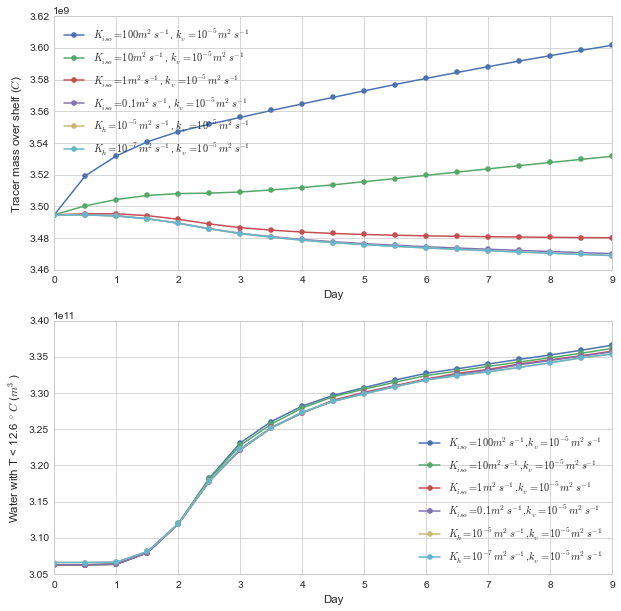

In [23]:
fig45=plt.figure(figsize=(10,10))
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)


ax1 = plt.subplot(2,1,1)

line0 = ax1.plot(times/2.0, TotXTIso100,'o-',label='$K_{iso}=100m^2s^{-1}$, $k_v=10^{-5}m^2s^{-1}$')
line1 = ax1.plot(times/2.0, TotXTIso10,'o-',label='$K_{iso}=10m^2s^{-1}$, $k_v=10^{-5}m^2s^{-1}$')
line2 = ax1.plot(times/2.0, TotXTIso1,'o-', label='$K_{iso}=1m^2s^{-1}$, $k_v=10^{-5}m^2s^{-1}$')
line3 = ax1.plot(times/2.0, TotXTIso01,'o-', label='$K_{iso}=0.1m^2s^{-1}$, $k_v=10^{-5}m^2s^{-1}$')
line4 = ax1.plot(times/2.0, TotXTNoREDI02,'o-', label='$K_{h}=10^{-5}m^2s^{-1}$, $k_v=10^{-5}m^2s^{-1}$')
line5 = ax1.plot(times/2.0, TotXTNoREDI03,'o-', label='$K_{h}=10^{-7}m^2s^{-1}$, $k_v=10^{-5}m^2s^{-1}$')

#line4 = ax1.plot(times/2.0, TotXTr2Iso10,'o-',label='K_{iso}=10$m^2s^{-1}$, k_v=10^{-3}$m^2s^{-1}$')
#line5 = ax1.plot(times/2.0, TotXTr2Iso1,'o-', label='K_{iso}=1$m^2s^{-1}$, k_v=10^{-3}$m^2s^{-1}$')
#line6 = ax1.plot(times/2.0, TotXTr2Iso01,'o-', label='K_{iso}=0.1$m^2s^{-1}$, k_v=10^{-3}$m^2s^{-1}$')

plt.ylabel('Tracer mass over shelf ($C$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line0 = ax2.plot(times/2.0, TotWatXTIso100,'o-',label='$K_{iso}=100m^2s^{-1}, k_v=10^{-5}m^2s^{-1}$')
line1 = ax2.plot(times/2.0, TotWatXTIso10,'o-',label='$K_{iso}=10m^2s^{-1}, k_v=10^{-5}m^2s^{-1}$')
line2 = ax2.plot(times/2.0, TotWatXTIso1,'o-', label='$K_{iso}=1m^2s^{-1}, k_v=10^{-5}m^2s^{-1}$')
line3 = ax2.plot(times/2.0, TotWatXTIso01,'o-', label='$K_{iso}=0.1m^2s^{-1}, k_v=10^{-5}m^2s^{-1}$')
line4 = ax2.plot(times/2.0, TotWatXTNoREDI02,'o-', label='$K_{h}=10^{-5}m^2s^{-1}, k_v=10^{-5}m^2s^{-1}$')
line5 = ax2.plot(times/2.0, TotWatXTNoREDI03,'o-', label='$K_{h}=10^{-7}m^2s^{-1}, k_v=10^{-5}m^2s^{-1}$')

#line4 = ax2.plot(times/2.0, TotWatXTr2Iso10,'o-',label='K_{iso}=10$m^2s^{-1}$, k_v=10^{-3}$m^2s^{-1}$')
#line5 = ax2.plot(times/2.0, TotWatXTr2Iso1,'o-', label='K_{iso}=1$m^2s^{-1}$, k_v=10^{-3}$m^2s^{-1}$')
#line6 = ax2.plot(times/2.0, TotWatXTr2Iso01,'o-', label='K_{iso}=0.1$m^2s^{-1}$, k_v=10^{-3}$m^2s^{-1}$')

plt.ylabel('Water with T < 12.6 $^{\circ}C$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)


#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/TrMassOverShelfCNT13DNoC1.eps', format='eps', dpi=1000,bbox_extra_artists=(leg,), bbox_inches='tight')


The yellow line is underneath the cyan


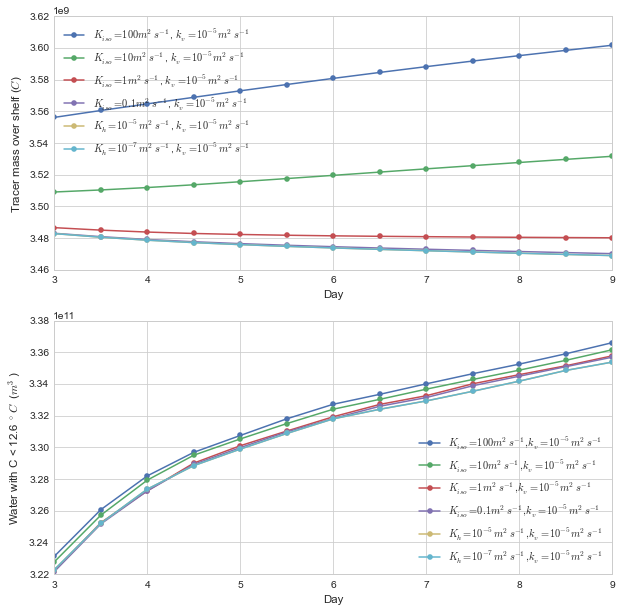

In [24]:
fig45=plt.figure(figsize=(10,10))
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

times = np.arange(6,nt,1)


ax1 = plt.subplot(2,1,1)

line0 = ax1.plot(times/2.0, TotXTIso100[6:],'o-',label='$K_{iso}=100m^2s^{-1}$, $k_v=10^{-5}m^2s^{-1}$')
line1 = ax1.plot(times/2.0, TotXTIso10[6:],'o-',label='$K_{iso}=10m^2s^{-1}$, $k_v=10^{-5}m^2s^{-1}$')
line2 = ax1.plot(times/2.0, TotXTIso1[6:],'o-', label='$K_{iso}=1m^2s^{-1}$, $k_v=10^{-5}m^2s^{-1}$')
line3 = ax1.plot(times/2.0, TotXTIso01[6:],'o-', label='$K_{iso}=0.1m^2s^{-1}$, $k_v=10^{-5}m^2s^{-1}$')
line4 = ax1.plot(times/2.0, TotXTNoREDI02[6:],'o-', label='$K_{h}=10^{-5}m^2s^{-1}$, $k_v=10^{-5}m^2s^{-1}$')
line5 = ax1.plot(times/2.0, TotXTNoREDI03[6:],'o-', label='$K_{h}=10^{-7}m^2s^{-1}$, $k_v=10^{-5}m^2s^{-1}$')

#line4 = ax1.plot(times/2.0, TotXTr2Iso10,'o-',label='K_{iso}=10$m^2s^{-1}$, k_v=10^{-3}$m^2s^{-1}$')
#line5 = ax1.plot(times/2.0, TotXTr2Iso1,'o-', label='K_{iso}=1$m^2s^{-1}$, k_v=10^{-3}$m^2s^{-1}$')
#line6 = ax1.plot(times/2.0, TotXTr2Iso01,'o-', label='K_{iso}=0.1$m^2s^{-1}$, k_v=10^{-3}$m^2s^{-1}$')

plt.ylabel('Tracer mass over shelf ($C$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line0 = ax2.plot(times/2.0, TotWatXTIso100[6:],'o-',label='$K_{iso}=100m^2s^{-1}, k_v=10^{-5}m^2s^{-1}$')
line1 = ax2.plot(times/2.0, TotWatXTIso10[6:],'o-',label='$K_{iso}=10m^2s^{-1}, k_v=10^{-5}m^2s^{-1}$')
line2 = ax2.plot(times/2.0, TotWatXTIso1[6:],'o-', label='$K_{iso}=1m^2s^{-1}, k_v=10^{-5}m^2s^{-1}$')
line3 = ax2.plot(times/2.0, TotWatXTIso01[6:],'o-', label='$K_{iso}=0.1m^2s^{-1}, k_v=10^{-5}m^2s^{-1}$')
line4 = ax2.plot(times/2.0, TotWatXTNoREDI02[6:],'o-', label='$K_{h}=10^{-5}m^2s^{-1}, k_v=10^{-5}m^2s^{-1}$')
line5 = ax2.plot(times/2.0, TotWatXTNoREDI03[6:],'o-', label='$K_{h}=10^{-7}m^2s^{-1}, k_v=10^{-5}m^2s^{-1}$')

#line4 = ax2.plot(times/2.0, TotWatXTr2Iso10,'o-',label='K_{iso}=10$m^2s^{-1}$, k_v=10^{-3}$m^2s^{-1}$')
#line5 = ax2.plot(times/2.0, TotWatXTr2Iso1,'o-', label='K_{iso}=1$m^2s^{-1}$, k_v=10^{-3}$m^2s^{-1}$')
#line6 = ax2.plot(times/2.0, TotWatXTr2Iso01,'o-', label='K_{iso}=0.1$m^2s^{-1}$, k_v=10^{-3}$m^2s^{-1}$')

plt.ylabel('Water with C < 12.6 $^{\circ}C$  ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)

print('The yellow line is underneath the cyan')
#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/TrMassOverShelfCNT13DNoC1.eps', format='eps', dpi=1000,bbox_extra_artists=(leg,), bbox_inches='tight')


### Case 2: Enhanced mixing inside the canyon (3D vertical diffusivity)


In [25]:
TotWatXTr13D = np.empty(nt)
TotWatXTr23D = np.empty(nt)
TotWatXTr33D = np.empty(nt)
TotWatXTr1Iso1 = np.empty(nt)

TotXTr13D = np.empty(nt)
TotXTr23D = np.empty(nt)
TotXTr33D = np.empty(nt)
TotXTr1Iso1 = np.empty(nt)

for time in range(0,nt,1):
    print(time)    
    (WaterX1, TrX1) = HowMuchWaterX(T3Drun01,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
    (WaterX2, TrX2) = HowMuchWaterX(T3Drun02,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
    (WaterX3, TrX3) = HowMuchWaterX(T3Drun03,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
    (WaterX4, TrX4) = HowMuchWaterX(TIso1,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
        
    TotXTr13D[time] = np.sum((TrX1)*dxG[0,:])*1.E-6
    TotWatXTr13D[time] = np.sum((WaterX1)*dxG[0,:])
    TotXTr23D[time] = np.sum((TrX2)*dxG[0,:])*1.E-6
    TotWatXTr23D[time] = np.sum((WaterX2)*dxG[0,:])
    TotXTr33D[time] = np.sum((TrX3)*dxG[0,:])*1.E-6
    TotWatXTr33D[time] = np.sum((WaterX3)*dxG[0,:])
    TotXTr1Iso1[time] = np.sum((TrX4)*dxG[0,:])*1.E-6
    TotWatXTr1Iso1[time] = np.sum((WaterX4)*dxG[0,:])
        
        


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


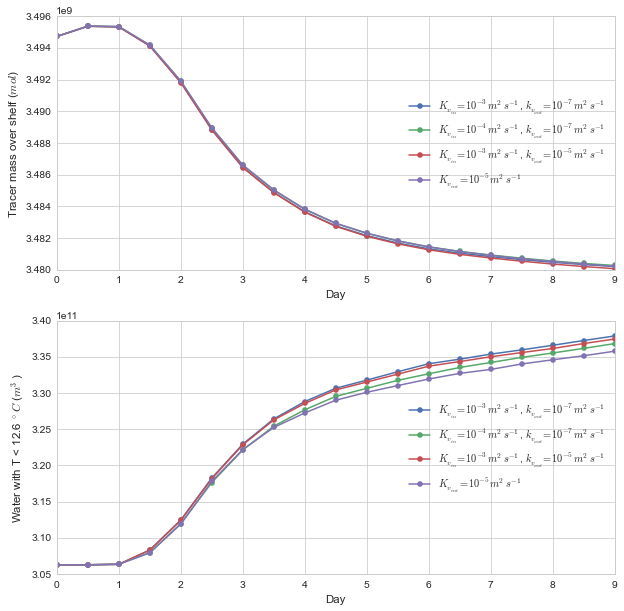

In [26]:
fig45=plt.figure(figsize=(10,10))
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)


ax1 = plt.subplot(2,1,1)

line1 = ax1.plot(times/2.0, TotXTr13D,'o-',label='$K_{v_{in}}=10^{-3}m^2s^{-1}$, $k_{v_{out}}=10^{-7}m^2s^{-1}$')
line2 = ax1.plot(times/2.0, TotXTr23D,'o-', label='$K_{v_{in}}=10^{-4}m^2s^{-1}$, $k_{v_{out}}=10^{-7}m^2s^{-1}$')
line3 = ax1.plot(times/2.0, TotXTr33D,'o-', label='$K_{v_{in}}=10^{-3}m^2s^{-1}$, $k_{v_{out}}=10^{-5}m^2s^{-1}$')
line3 = ax1.plot(times/2.0, TotXTr1Iso1,'o-', label='$K_{v_{cnt}}=10^{-5}m^2s^{-1}$')


plt.ylabel('Tracer mass over shelf ($mol$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line1 = ax2.plot(times/2.0, TotWatXTr13D,'o-',label='$K_{v_{in}}=10^{-3}m^2s^{-1}$, $k_{v_{out}}=10^{-7}m^2s^{-1}$')
line2 = ax2.plot(times/2.0, TotWatXTr23D,'o-', label='$K_{v_{in}}=10^{-4}m^2s^{-1}$, $k_{v_{out}}=10^{-7}m^2s^{-1}$')
line3 = ax2.plot(times/2.0, TotWatXTr33D,'o-', label='$K_{v_{in}}=10^{-3}m^2s^{-1}$, $k_{v_{out}}=10^{-5}m^2s^{-1}$')
line4 = ax2.plot(times/2.0, TotWatXTr1Iso1,'o-', label='$K_{v_{cnt}}=10^{-5}m^2s^{-1}$')



plt.ylabel('Water with T < 12.6 $^{\circ}C$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=5)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=5)


#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/TrMassOverShelfCNT13DNoC1.eps', format='eps', dpi=1000,bbox_extra_artists=(leg,), bbox_inches='tight')


### Case 3: Varying Kv and flat shelf 

In [27]:
TotWatXTr1NoR02 = np.empty(nt)
TotWatXTr3NoR02 = np.empty(nt)
TotWatXTr1NoR03 = np.empty(nt)
TotWatXTr2NoR03 = np.empty(nt)
TotWatXTr3NoR03 = np.empty(nt)
TotWatXTr1NoRNoC = np.empty(nt)
TotWatXTr2NoRNoC = np.empty(nt)
TotWatXTr3NoRNoC = np.empty(nt)

TotXTr1NoR02 = np.empty(nt)
TotXTr2NoR02 = np.empty(nt)
TotXTr3NoR02 = np.empty(nt)
TotXTr1NoR03 = np.empty(nt)
TotXTr2NoR03 = np.empty(nt)
TotXTr3NoR03 = np.empty(nt)
TotXTr1NoRNoC = np.empty(nt)
TotXTr2NoRNoC = np.empty(nt)
TotXTr3NoRNoC = np.empty(nt)


for time in range(0,nt,1):
    print(time)    
    (WaterX1, TrX1) = HowMuchWaterX(TNoREDI02,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
    (WaterX4, TrX4) = HowMuchWaterX(TNoREDI03,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
    
    (WaterX7, TrX7) = HowMuchWaterX(TNoRNoC,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
        
    TotXTr1NoR02[time] = np.sum((TrX1)*dxG[0,:])*1.E-6
    TotWatXTr1NoR02[time] = np.sum((WaterX1)*dxG[0,:])
        
    TotXTr1NoR03[time] = np.sum((TrX4)*dxG[0,:])*1.E-6
    TotWatXTr1NoR03[time] = np.sum((WaterX4)*dxG[0,:])
    
    TotXTr1NoRNoC[time] = np.sum((TrX7)*dxG[0,:])*1.E-6
    TotWatXTr1NoRNoC[time] = np.sum((WaterX7)*dxG[0,:])
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


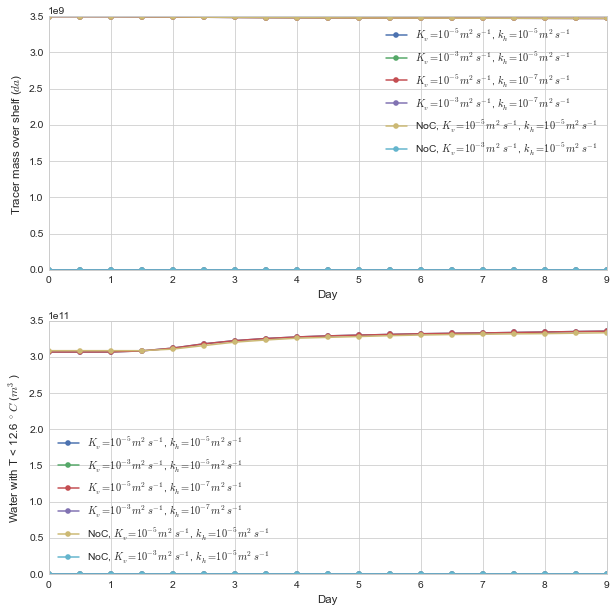

In [29]:
fig45=plt.figure(figsize=(10,10))
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)

ax1 = plt.subplot(2,1,1)

line1 = ax1.plot(times/2.0, TotXTr1NoR02,'o-',label='$K_{v}=10^{-5}m^2s^{-1}$, $k_{h}=10^{-5}m^2s^{-1}$')
#line2 = ax1.plot(times/2.0, TotXTr2NoR02,'o-', label='$K_{v}=10^{-4}m^2s^{-1}$, $k_{h}=10^{-5}m^2s^{-1}$ ')
line3 = ax1.plot(times/2.0, TotXTr3NoR02,'o-', label='$K_{v}=10^{-3}m^2s^{-1}$, $k_{h}=10^{-5}m^2s^{-1}$')
line4 = ax1.plot(times/2.0, TotXTr1NoR03,'o-', label='$K_{v}=10^{-5}m^2s^{-1}$, $k_{h}=10^{-7}m^2s^{-1}$')
#line5 = ax1.plot(times/2.0, TotXTr2NoR03,'o-', label='$K_{v}=10^{-4}m^2s^{-1}$, $k_{h}=10^{-7}m^2s^{-1}$')
line6 = ax1.plot(times/2.0, TotXTr3NoR03,'o-', label='$K_{v}=10^{-3}m^2s^{-1}$, $k_{h}=10^{-7}m^2s^{-1}$')
line7 = ax1.plot(times/2.0, TotXTr1NoRNoC,'o-', label='NoC, $K_{v}=10^{-5}m^2s^{-1}$, $k_{h}=10^{-5}m^2s^{-1}$')
#line8 = ax1.plot(times/2.0, TotXTr2NoRNoC,'o-', label='NoC, $K_{v}=10^{-4}m^2s^{-1}$, $k_{h}=10^{-5}m^2s^{-1}$')
line9 = ax1.plot(times/2.0, TotXTr3NoRNoC,'o-', label='NoC, $K_{v}=10^{-3}m^2s^{-1}$, $k_{h}=10^{-5}m^2s^{-1}$')


plt.ylabel('Tracer mass over shelf ($da$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line1 = ax2.plot(times/2.0, TotWatXTr1NoR02,'o-',label='$K_{v}=10^{-5}m^2s^{-1}$, $k_{h}=10^{-5}m^2s^{-1}$')
#line2 = ax2.plot(times/2.0, TotWatXTr2NoR02,'o-', label='$K_{v}=10^{-4}m^2s^{-1}$, $k_{h}=10^{-5}m^2s^{-1}$ ')
line3 = ax2.plot(times/2.0, TotWatXTr3NoR02,'o-', label='$K_{v}=10^{-3}m^2s^{-1}$, $k_{h}=10^{-5}m^2s^{-1}$')
line4 = ax2.plot(times/2.0, TotWatXTr1NoR03,'o-', label='$K_{v}=10^{-5}m^2s^{-1}$, $k_{h}=10^{-7}m^2s^{-1}$')
#line5 = ax2.plot(times/2.0, TotWatXTr2NoR03,'o-', label='$K_{v}=10^{-4}m^2s^{-1}$, $k_{h}=10^{-7}m^2s^{-1}$')
line6 = ax2.plot(times/2.0, TotWatXTr3NoR03,'o-', label='$K_{v}=10^{-3}m^2s^{-1}$, $k_{h}=10^{-7}m^2s^{-1}$')
line7 = ax2.plot(times/2.0, TotWatXTr1NoRNoC,'o-', label='NoC, $K_{v}=10^{-5}m^2s^{-1}$, $k_{h}=10^{-5}m^2s^{-1}$')
#line8 = ax2.plot(times/2.0, TotWatXTr2NoRNoC,'o-', label='NoC, $K_{v}=10^{-4}m^2s^{-1}$, $k_{h}=10^{-5}m^2s^{-1}$')
line9 = ax2.plot(times/2.0, TotWatXTr3NoRNoC,'o-', label='NoC, $K_{v}=10^{-3}m^2s^{-1}$, $k_{h}=10^{-5}m^2s^{-1}$')



plt.ylabel('Water with T < 12.6 $^{\circ}C$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)


#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/TrMassOverShelfCNT13DNoC1.eps', format='eps', dpi=1000,bbox_extra_artists=(leg,), bbox_inches='tight')


In [31]:
TotWatXTr1Iso1 = np.empty(nt)
TotWatXTr2Iso1 = np.empty(nt)
TotWatXTr1NoC = np.empty(nt)
TotWatXTr2NoC = np.empty(nt)

TotXTr2Iso1 = np.empty(nt)
TotXTr1Iso1 = np.empty(nt)
TotXTr1NoC = np.empty(nt)
TotXTr2NoC = np.empty(nt)

for time in range(0,nt,1):
    print(time)    
    (WaterX1, TrX1) = HowMuchWaterX(TIso1,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
    (WaterX3, TrX3) = HowMuchWaterX(TNoC,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
        
    TotXTr1Iso1[time] = np.sum((TrX1)*dxG[0,:])*1.E-6
    TotWatXTr1Iso1[time] = np.sum((WaterX1)*dxG[0,:])
    TotXTr2Iso1[time] = np.sum((TrX2)*dxG[0,:])*1.E-6
    TotWatXTr2Iso1[time] = np.sum((WaterX2)*dxG[0,:])
    TotXTr1NoC[time] = np.sum((TrX3)*dxG[0,:])*1.E-6
    TotWatXTr1NoC[time] = np.sum((WaterX3)*dxG[0,:])
    TotXTr2NoC[time] = np.sum((TrX4)*dxG[0,:])*1.E-6
    TotWatXTr2NoC[time] = np.sum((WaterX4)*dxG[0,:])
        
        


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


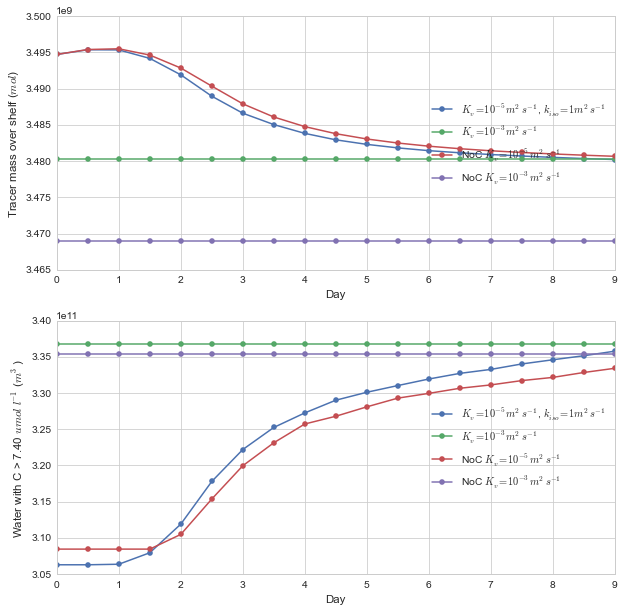

In [32]:
fig45=plt.figure(figsize=(10,10))
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)


ax1 = plt.subplot(2,1,1)

line1 = ax1.plot(times/2.0, TotXTr1Iso1,'o-',label='$K_{v}=10^{-5}m^2s^{-1}$, $k_{iso}=1m^2s^{-1}$')
line2 = ax1.plot(times/2.0, TotXTr2Iso1,'o-', label='$K_{v}=10^{-3}m^2s^{-1}$ ')
line3 = ax1.plot(times/2.0, TotXTr1NoC,'o-', label='NoC $K_{v}=10^{-5}m^2s^{-1}$')
line3 = ax1.plot(times/2.0, TotXTr2NoC,'o-', label='NoC $K_{v}=10^{-3}m^2s^{-1}$')


plt.ylabel('Tracer mass over shelf ($mol$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line1 = ax2.plot(times/2.0, TotWatXTr1Iso1,'o-',label='$K_{v}=10^{-5}m^2s^{-1}$, $k_{iso}=1m^2s^{-1}$')
line2 = ax2.plot(times/2.0, TotWatXTr2Iso1,'o-', label='$K_{v}=10^{-3}m^2s^{-1}$')
line3 = ax2.plot(times/2.0, TotWatXTr1NoC,'o-', label='NoC $K_{v}=10^{-5}m^2s^{-1}$')
line4 = ax2.plot(times/2.0, TotWatXTr2NoC,'o-', label='NoC $K_{v}=10^{-3}m^2s^{-1}$')



plt.ylabel('Water with C > 7.40 $umol$ $l^{-1}$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=5)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=5)


#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/TrMassOverShelfCNT13DNoC1.eps', format='eps', dpi=1000,bbox_extra_artists=(leg,), bbox_inches='tight')


### Case 4: Isolating canyon effects

In [29]:
TotWatXTr1Iso1 = np.empty(nt)
TotWatXTr33D = np.empty(nt)
TotWatXTr1NoC = np.empty(nt)
TotWatXTr1NoR02 = np.empty(nt)
TotWatXTr1NoRNoC = np.empty(nt)

TotXTr1Iso1 = np.empty(nt)
TotXTr33D = np.empty(nt)
TotXTr1NoC = np.empty(nt)
TotXTr1NoR02 = np.empty(nt)
TotXTr1NoRNoC = np.empty(nt)

for time in range(0,nt,1):
    print(time)    
    (WaterX1, TrX1) = HowMuchWaterX(TIso1,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
    (WaterX2, TrX2) = HowMuchWaterX(T33D,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
    (WaterX3, TrX3) = HowMuchWaterX(TNoC,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
    (WaterX4, TrX4) = HowMuchWaterX(TNoREDI02,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
    (WaterX5, TrX5) = HowMuchWaterX(TNoRNoC,MaskNoC,30,rA,hFacCNoC,drFNoC,time,nx,dxG)
        
    TotXTr1Iso1[time] = np.sum((TrX1)*dxG[0,:])*1.E-6
    TotWatXTr1Iso1[time] = np.sum((WaterX1)*dxG[0,:])
    TotXTr33D[time] = np.sum((TrX2)*dxG[0,:])*1.E-6
    TotWatXTr33D[time] = np.sum((WaterX2)*dxG[0,:])
    TotXTr1NoC[time] = np.sum((TrX3)*dxG[0,:])*1.E-6
    TotWatXTr1NoC[time] = np.sum((WaterX3)*dxG[0,:])
    TotXTr1NoR02[time] = np.sum((TrX4)*dxG[0,:])*1.E-6
    TotWatXTr1NoR02[time] = np.sum((WaterX4)*dxG[0,:])
    TotXTr1NoRNoC[time] = np.sum((TrX5)*dxG[0,:])*1.E-6
    TotWatXTr1NoRNoC[time] = np.sum((WaterX5)*dxG[0,:])
        
        

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


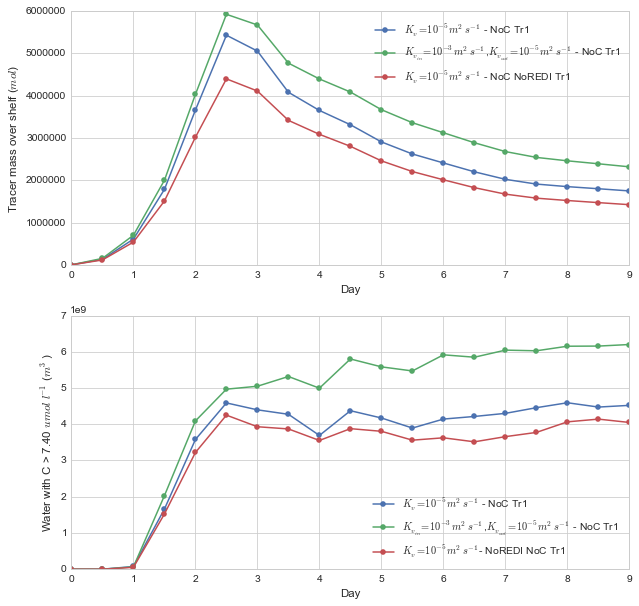

In [30]:
fig45=plt.figure(figsize=(10,10))
sns.set(context='paper', style='whitegrid', font='sans-serif', font_scale=1.3,rc={"lines.linewidth": 1.5})

times = np.arange(0,nt,1)


ax1 = plt.subplot(2,1,1)

line1 = ax1.plot(times/2.0, TotXTr1Iso1-TotXTr1NoC,'o-',label='$K_{v}=10^{-5}m^2s^{-1}$ - NoC Tr1')
line2 = ax1.plot(times/2.0, TotXTr33D-TotXTr1NoC,'o-', label='$K_{v_{in}}=10^{-3}m^2s^{-1}$,$K_{v_{out}}=10^{-5}m^2s^{-1}$ - NoC Tr1')
line2 = ax1.plot(times/2.0, TotXTr1NoR02-TotXTr1NoRNoC,'o-', label='$K_{v}=10^{-5}m^2s^{-1}$ - NoC NoREDI Tr1')


plt.ylabel('Tracer mass over shelf ($mol$) ')
plt.xlabel('Day')


ax2 = plt.subplot(2,1,2)

line1 = ax2.plot(times/2.0, TotWatXTr1Iso1-TotWatXTr1NoC,'o-',label='$K_{v}=10^{-5}m^2s^{-1}$ - NoC Tr1')
line2 = ax2.plot(times/2.0, TotWatXTr33D-TotWatXTr1NoC,'o-', label='$K_{v_{in}}=10^{-3}m^2s^{-1}$,$K_{v_{out}}=10^{-5}m^2s^{-1}$ - NoC Tr1 ')
line2 = ax2.plot(times/2.0, TotWatXTr1NoR02-TotWatXTr1NoRNoC,'o-', label='$K_{v}=10^{-5}m^2s^{-1}$- NoREDI NoC Tr1 ')


plt.ylabel('Water with C > 7.40 $umol$ $l^{-1}$ ($m^3$)')
plt.xlabel('Day')
    
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc=0)
   
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, labels,loc=0)


#fig45.savefig('/ocean/kramosmu/Figures/WaterVolumeOverShelf/TrMassOverShelfCNT13DNoC1.eps', format='eps', dpi=1000,bbox_extra_artists=(leg,), bbox_inches='tight')


###Results:







